# Imports

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,  StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from analyser import Analyser

# Load & Transform

In [2]:
liar_analyser = Analyser()

liar_analyser.prep_liar_data('liar_dataset/train.tsv','liar_dataset/valid.tsv','liar_dataset/test.tsv')

In [4]:
train, test = liar_analyser.train,liar_analyser.test

# Lemmatisation

In [5]:
lemmatiser = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
def lemmatise(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatiser.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

In [7]:
train['statement'] = train['statement'].apply(lemmatise)
test['statement'] = test['statement'].apply(lemmatise)

# Test train split & Crossvalidation

In [8]:
X_train = train['statement']
y_train = train['label']
X_test = test['statement']
y_test = test['label']

In [9]:
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(max_features=5000)),
    ('svc',SVC(kernel='linear',C=1.0, probability=True, random_state=42))
])

In [10]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [11]:
cv_scores = cross_val_score(pipeline,X_train,y_train,cv=cv,scoring='accuracy')

In [12]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-validation scores: [0.60607375 0.5978308  0.59739696 0.60043384 0.60590278]
Mean Accuracy: 0.60
Standard Deviation: 0.00


# Fit & Predict

In [14]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [15]:
preds = pipeline.predict(X_test)

# Evaluate

Model Accuracy: 0.6148

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       553
           1       0.64      0.73      0.68       714

    accuracy                           0.61      1267
   macro avg       0.61      0.60      0.60      1267
weighted avg       0.61      0.61      0.61      1267



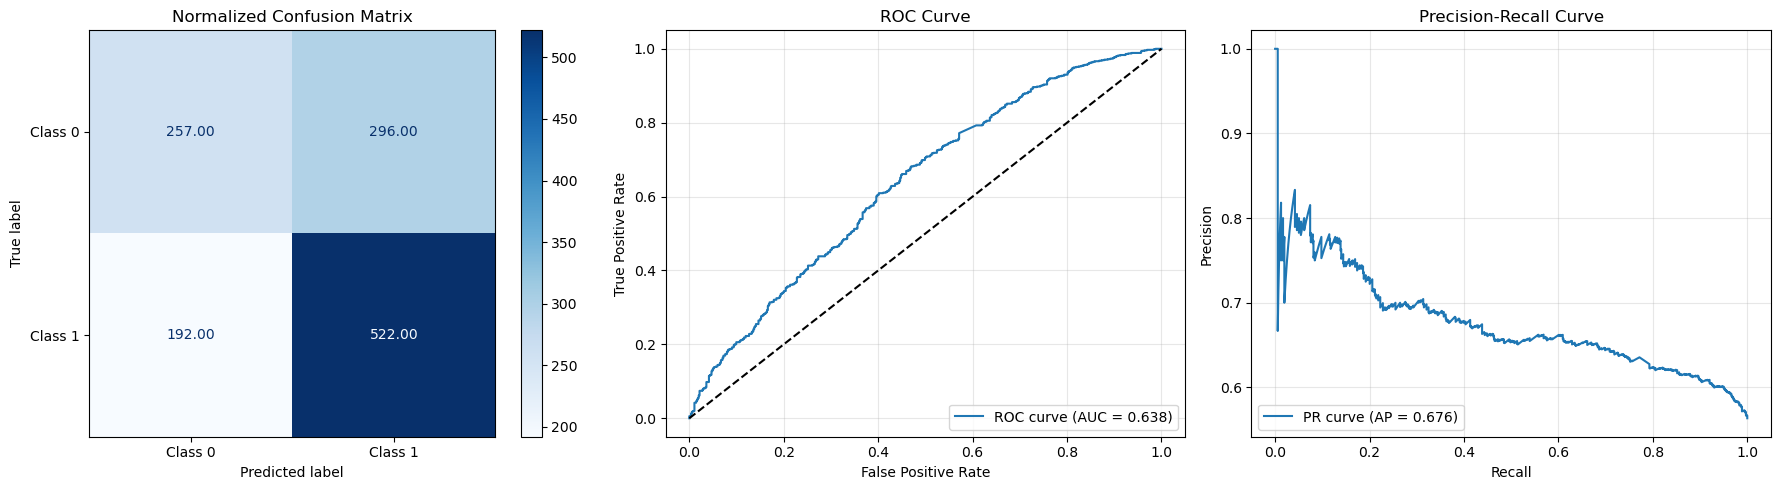

In [17]:
metrics = liar_analyser.evaluate_model(preds, y_test, X_test, pipeline)